In [39]:
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [76]:
def generate_payoff_matrix(N):
    n = int((N + 2) * (N + 1) / 2)
    A = np.zeros([n, n])
    pure_strat = []
    for i in range(N + 1):
        for j in range(N - i + 1):
            pure_strat.append((i, j, N - i - j))
    for i in range(n):
        for j in range(n):
            competition = 0
            for k in range(3):
                if pure_strat[i][k] > pure_strat[j][k]:
                    competition += 1
                elif pure_strat[i][k] < pure_strat[j][k]:
                    competition += -1

            A[i, j] = np.sign(competition)
    return A

def reduced_matrix(N, A=None):
    if A is None:
        A = generate_payoff_matrix(N)
    A = np.delete(A, [0, N, int((N+1)*(N+2) / 2) - 1], axis=0)
    A = np.delete(A, [0, N, int((N+1)*(N+2) / 2) - 1], axis=1)
    return A

def A_plus(A):
    for i in range(len(A[:,0])):
        for j in range(len(A[:,0])):
            if A[i,j] == -1:
                A[i,j] = 0
    return A



N = 100
A = generate_payoff_matrix(N)
A = reduced_matrix(N, A)
A = A_plus(A)
A = csr_matrix(A)



In [79]:

def power_method(A, num_iter=100, tol=1e-6):
    """
    Power Method to compute the dominant eigenvalue and eigenvector of a sparse matrix.

    Parameters:
        A (scipy.sparse.csr_matrix): Sparse matrix (assumed square).
        num_iter (int): Maximum number of iterations.
        tol (float): Convergence tolerance for eigenvalue.

    Returns:
        eigenvalue (float): Dominant eigenvalue.
        eigenvector (np.ndarray): Dominant eigenvector.
    """
    # Initialize a random vector
    n = A.shape[0]
    b = np.random.rand(n)
    b = b / np.linalg.norm(b)  # Normalize the initial vector

    eigenvalue = 0

    for _ in range(num_iter):
        # Matrix-vector multiplication
        b_new = A @ b
        # Compute new eigenvalue estimate
        eigenvalue_new = np.linalg.norm(b_new)
        # Normalize the new vector
        b_new = b_new / eigenvalue_new

        # Check for convergence
        if np.abs(eigenvalue_new - eigenvalue) < tol:
            break

        eigenvalue = eigenvalue_new
        b = b_new

    return eigenvalue, b

# Example Usage
# Create a sparse matrix


# Apply power method
eigval, eigvec = power_method(A)
print("Dominant Eigenvalue:", eigval)
print("Dominant Eigenvector:", eigvec)
nash_eq = [0, *list(eigvec[:(N-1)]), 0, *list(eigvec[(N-1):]), 0]
print(nash_eq)


Dominant Eigenvalue: 2291.966865007946
Dominant Eigenvector: [0.00042536 0.00085539 0.00128958 ... 0.00085539 0.00042536 0.00042536]
[0, np.float64(0.00042536217752922633), np.float64(0.0008553940484326009), np.float64(0.001289580261872858), np.float64(0.0017273909780174195), np.float64(0.002168282725207486), np.float64(0.002611699299044159), np.float64(0.0030570727015615078), np.float64(0.0035038241185253323), np.float64(0.003951364932770385), np.float64(0.004399097771368117), np.float64(0.004846417584302149), np.float64(0.005292712752220275), np.float64(0.005737366220729757), np.float64(0.0061797566586078495), np.float64(0.006619259637211858), np.float64(0.007055248828293209), np.float64(0.007487097217347951), np.float64(0.007914178329572289), np.float64(0.008335867465436445), np.float64(0.008751542942843462), np.float64(0.009160587342801346), np.float64(0.009562388755508354), np.float64(0.00995634202373085), np.float64(0.01034184998034288), np.float64(0.01071832467689448), np.float6

[[0.   0.   1.  ]
 [0.   0.01 0.99]
 [0.   0.02 0.98]
 ...
 [0.99 0.   0.01]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]]


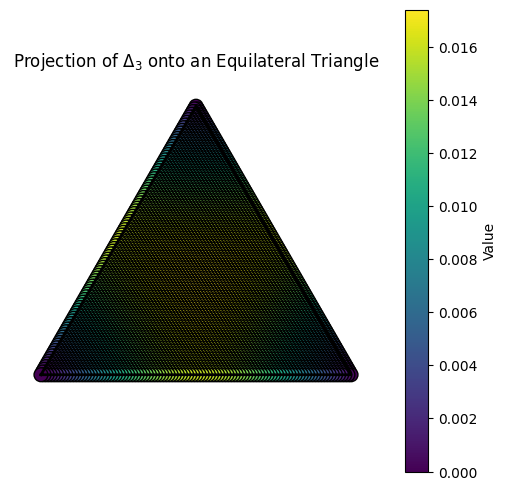

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Generate barycentric coordinates for points on \Delta_3
def generate_simplex_points(n):
    """Generates barycentric coordinates for points in the 3-simplex."""
    coords = []
    for i in range(n + 1):
        for j in range(n + 1 - i):
            k = n - i - j
            coords.append([i / n, j / n, k / n])
    return np.array(coords)

# Map barycentric coordinates to 2D equilateral triangle
def barycentric_to_cartesian_2d(points):
    """Maps barycentric coordinates to 2D Cartesian space."""
    # Define triangle vertices in 2D
    v0 = np.array([0, 0])                     # Vertex for (1, 0, 0)
    v1 = np.array([1, 0])                     # Vertex for (0, 1, 0)
    v2 = np.array([0.5, np.sqrt(3) / 2])      # Vertex for (0, 0, 1)

    return points[:, 0:1] * v0 + points[:, 1:2] * v1 + points[:, 2:3] * v2

# Generate data
n = N # Number of divisions for the simplex
bary_coords = generate_simplex_points(n)
cartesian_coords = barycentric_to_cartesian_2d(bary_coords)
print(bary_coords)
values = nash_eq  # Random data values for each point

# Create the 2D plot
fig, ax = plt.subplots(figsize=(6, 6))

# Unpack Cartesian coordinates
x, y = cartesian_coords[:, 0], cartesian_coords[:, 1]

# Plot bars as colored dots on the triangle
sc = ax.scatter(x, y, c=values, cmap='viridis', s=100, edgecolor='k')

# Add colorbar for value interpretation
plt.colorbar(sc, label='Value')

# Draw the triangle outline
triangle_vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2], [0, 0]])
ax.plot(triangle_vertices[:, 0], triangle_vertices[:, 1], 'k-', lw=2)

# Customize the plot
ax.set_aspect('equal')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, np.sqrt(3) / 2 + 0.1)
ax.axis('off')  # Turn off the axis for cleaner visualization
plt.title("Projection of $\Delta_3$ onto an Equilateral Triangle")
plt.show()
